In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data
#split into train_test_Validatios sets
#Build a model
#Fit the model
#evaluate the model 

In [3]:
def importa(archivo,nombres):
 data = pd.read_csv(archivo,sep=',',names=nombres,skiprows=0)#para archivo simple
 return data

In [4]:
def sigmoid(z):
 sigma=1/(1+np.exp(-z))
 return sigma
def MSE(y,h): 
    C=np.mean(((y-h)**2))
    return C
def dC(y,h,nlf): #dC/dh
 dcdh=(-2*(y-h))/nlf
 return dcdh
def dh(z): #dh/dz
 dhdz=sigmoid(z)*(1-sigmoid(z))
 return dhdz
def dz(h): #dz/dw
 dzdw=h
 return dzdw

In [5]:
def input(h,data,i):
      h[0][0]=data.I1[i] 
      h[0][1]=data.I2[i]
      return h[0]

In [6]:
def train(data,etha,epochs):
  w=np.array((np.random.rand(2,2)))
  h=np.array((np.random.rand(2,1),np.random.rand(2,1)))
  b=np.array((np.random.rand(2,1)))
  #z=np.array((np.random.rand(2,1)))
  iw=w
  ib=b
  #alpha=.1
  costo=[]
  print('initial weights:',iw)
  for e in range(epochs):
       for i in range(0,len(data.I1)):
        z=w.dot(input(h,data,i))+b
        h[1]=sigmoid(z)
        y=np.array([[data.OR[i]],[data.AND[i]]])
        nodes_to_right=2
       for n in range (0,nodes_to_right):
        #print(w)
        Dw=etha*(np.transpose(dC(y[n],h[1][n],2)*dh(z[n])*dz(input(h,data,i))))
        #print('step of node'+str(n)+str(step))
        w[n]=w[n]-Dw
        #print('new w',w)
        #Dw=np.transpose(dC(y[0],h[1][0],2)*dh(z[1])*dz(input(h,data,i)))
       Db=dC(y,h[1],2)*dh(z)
        #w=w-(etha*Dw)
       b=b-(etha*Db)
       costo.append(MSE(y,h[1]))
       #print(MSE(y,h[1]))
  dfcost=pd.DataFrame(costo)
  fig, ax=plt.subplots(figsize=(10,5))
  ax.plot(dfcost)
  print('final weights',w)
  print('bias',b)
  print('final cost',MSE(y,h[1]))
  print('BP step',Dw)
  print('y',y)
  return(w,h,b,iw,ib)
#h=np.array((np.random.rand(2,1),np.random.rand(2,1)))
#b=np.array((np.random.rand(2,1)))

# Pruebas

In [25]:
i=0
costo=[]
y=np.array([[data.OR[i]],[data.AND[i]]])
w=np.array((np.random.rand(2,2)))
h=np.array((np.random.rand(2,1),np.random.rand(2,1)))
b=np.array((np.random.rand(2,1)))
z=w.dot(input(h,data,i))+b
h[1]=sigmoid(z)
nodes_to_right=2
for n in range (0,nodes_to_right):
  print(w)
  Delta=dC(y[n],h[1][n],2)*dh(z[n])*dz(input(h,data,i))
  step=np.transpose(Delta)
  print('step of node'+str(n)+str(step))
  w[n]=w[n]-step
  print('new w',w)
costo.append(MSE(y,h[1]))

[[0.01186308 0.39398204]
 [0.41615532 0.71861802]]
step of node0[[-0.05645484 -0.05645484]]
new w [[0.06831792 0.45043688]
 [0.41615532 0.71861802]]
[[0.06831792 0.45043688]
 [0.41615532 0.71861802]]
step of node1[[-0.02147628 -0.02147628]]
new w [[0.06831792 0.45043688]
 [0.43763161 0.7400943 ]]


In [39]:
i=1
n=0
d=dC(y[n],h[1][n],2)*dh(z[n])*dz(input(h,data,i))
print(str(dC(y[n],h[1][n],2))+'*'+str(dh(z[n]))+'*'+str(dz(input(h,data,i))))
5*np.transpose(d)

[-0.28002106]*[0.20160927]*[[0.]
 [1.]]


array([[-0.       , -0.2822742]])

In [7]:
def predict(h,w):
      z=w.dot(h[0])+b
      h[1]=sigmoid(z)
      return(h[1])

In [8]:
archivo='ANDOR.csv'
nombres=['I1','I2','OR','AND']
data=importa(archivo,nombres)
data

,I1,I2,OR,AND
0,1,1,1,1
1,0,1,1,0
2,1,0,1,0
3,0,0,0,0


initial weights: [[0.29146406 0.42208366]
 [0.31015233 0.33496968]]
final weights [[0.29146406 0.42208366]
 [0.31015233 0.33496968]]
bias [[-3.22391946]
 [-3.22057881]]
final cost 0.0014701311656154306
BP step [[0. 0.]]
y [[0]
 [0]]


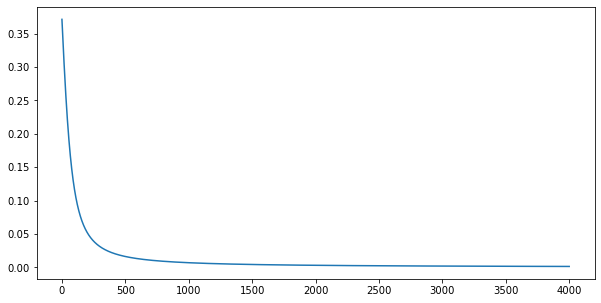

In [9]:
epochs=4000
etha=.1
#nl2=2
T=train(data,etha,epochs)
w=T[0]
h=T[1]
b=T[2]

In [10]:
for i in range (0,4,1):
 print(str(input(h,data,i))+ str(predict(h,w)))

[[1.]
 [1.]][[0.07513427]
 [0.07073478]]
[[0.]
 [1.]][[0.05722505]
 [0.05286956]]
[[1.]
 [0.]][[0.0505723 ]
 [0.05164055]]
[[0.]
 [0.]][[0.03827545]
 [0.03839861]]


In [11]:
T[3]

array([[0.29146406, 0.42208366],
       [0.31015233, 0.33496968]])

# Tensorflow

In [12]:
import tensorflow as tf #1st part
from tensorflow  import keras 
from tensorflow.keras import layers

In [13]:
x_train=np.array([[1,1],[1,0],[0,1],[0,0]])
y_train=np.array([[1,1],[1,0],[1,0],[0,0]])
initial_weights=T[3]
ib=T[4]

In [14]:
model=keras.Sequential()
model.add(keras.Input(shape=2))
model.add(layers.Dense(2,activation='sigmoid'))
#model.set_weights([initial_weights])
#print(model.summary())
model.compile(loss="MSE",optimizer=keras.optimizers.SGD(lr=10))
history=model.fit(x_train,y_train,epochs=2000)
model.summary()
print(model.weights)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 1s 160ms/sample - loss: 0.2115
Epoch 2/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.1522
Epoch 3/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.1370
Epoch 4/2000
4/4 [==============================] - 0s 1000us/sample - loss: 0.1243
Epoch 5/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1134
Epoch 6/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1041
Epoch 7/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0962
Epoch 8/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0893
Epoch 9/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0833
Epoch 10/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0780
Epoch 11/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0734
Epoch 12/2000
4/4 [==============================] - 0s 999us/sample - 

Epoch 99/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0094
Epoch 100/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0093
Epoch 101/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0092
Epoch 102/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0091
Epoch 103/2000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0090
Epoch 104/2000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0089
Epoch 105/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0088
Epoch 106/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0087
Epoch 107/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0086
Epoch 108/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0085
Epoch 109/2000
4/4 [==============================] - 0s 999us/sample - loss: 0.0084
Epoch 110/2000
4/4 [==============================] - 0s 750us/s

Epoch 196/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0044
Epoch 197/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0043
Epoch 198/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0043
Epoch 199/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0043
Epoch 200/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0043
Epoch 201/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0042
Epoch 202/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0042
Epoch 203/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0042
Epoch 204/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0042
Epoch 205/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0042
Epoch 206/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0041
Epoch 207/2000
4/4 [==============================] - 0s 750us/sa

Epoch 293/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 294/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 295/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028
Epoch 296/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 297/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 298/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 299/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0027
Epoch 300/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 301/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0027
Epoch 302/2000
4/4 [==============================] - 0s 999us/sample - loss: 0.0027
Epoch 303/2000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0027
Epoch 304/2000
4/4 [==============================] - 0s 750us/s

Epoch 390/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0020
Epoch 391/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0020
Epoch 392/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0020
Epoch 393/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 394/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 395/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0020
Epoch 396/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 397/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0020
Epoch 398/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0020
Epoch 399/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 400/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 401/2000
4/4 [==============================] - 0s 1ms/sample - l

Epoch 487/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0016
Epoch 488/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 489/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0016
Epoch 490/2000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0016
Epoch 491/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0016
Epoch 492/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0016
Epoch 493/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0016
Epoch 494/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0016
Epoch 495/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0016
Epoch 496/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 497/2000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0016
Epoch 498/2000
4/4 [==============================] - 0s 750us/sample

Epoch 584/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0013
Epoch 585/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0013
Epoch 586/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0013
Epoch 587/2000
4/4 [==============================] - 0s 999us/sample - loss: 0.0013
Epoch 588/2000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0013
Epoch 589/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0013
Epoch 590/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0013
Epoch 591/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0013
Epoch 592/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0013
Epoch 593/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0013
Epoch 594/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0013
Epoch 595/2000
4/4 [==============================] - 0s 749us/s

Epoch 681/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0011
Epoch 682/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0011
Epoch 683/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0011
Epoch 684/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0011
Epoch 685/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0011
Epoch 686/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0011
Epoch 687/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0011
Epoch 688/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0011
Epoch 689/2000
4/4 [==============================] - 0s 500us/sample - loss: 0.0011
Epoch 690/2000
4/4 [==============================] - 0s 999us/sample - loss: 0.0011
Epoch 691/2000
4/4 [==============================] - 0s 999us/sample - loss: 0.0011
Epoch 692/2000
4/4 [==============================] - 0s 750us/sa

Epoch 777/2000
4/4 [==============================] - 0s 750us/sample - loss: 9.6872e-04
Epoch 778/2000
4/4 [==============================] - 0s 999us/sample - loss: 9.6738e-04
Epoch 779/2000
4/4 [==============================] - 0s 999us/sample - loss: 9.6605e-04
Epoch 780/2000
4/4 [==============================] - 0s 750us/sample - loss: 9.6473e-04
Epoch 781/2000
4/4 [==============================] - 0s 750us/sample - loss: 9.6340e-04
Epoch 782/2000
4/4 [==============================] - 0s 500us/sample - loss: 9.6208e-04
Epoch 783/2000
4/4 [==============================] - 0s 750us/sample - loss: 9.6077e-04
Epoch 784/2000
4/4 [==============================] - 0s 1000us/sample - loss: 9.5945e-04
Epoch 785/2000
4/4 [==============================] - 0s 750us/sample - loss: 9.5815e-04
Epoch 786/2000
4/4 [==============================] - 0s 749us/sample - loss: 9.5684e-04
Epoch 787/2000
4/4 [==============================] - 0s 500us/sample - loss: 9.5554e-04
Epoch 788/2000
4/4 [

Epoch 869/2000
4/4 [==============================] - 0s 999us/sample - loss: 8.5943e-04
Epoch 870/2000
4/4 [==============================] - 0s 750us/sample - loss: 8.5837e-04
Epoch 871/2000
4/4 [==============================] - 0s 500us/sample - loss: 8.5732e-04
Epoch 872/2000
4/4 [==============================] - 0s 750us/sample - loss: 8.5627e-04
Epoch 873/2000
4/4 [==============================] - 0s 750us/sample - loss: 8.5522e-04
Epoch 874/2000
4/4 [==============================] - 0s 1000us/sample - loss: 8.5418e-04
Epoch 875/2000
4/4 [==============================] - 0s 750us/sample - loss: 8.5314e-04
Epoch 876/2000
4/4 [==============================] - 0s 1000us/sample - loss: 8.5210e-04
Epoch 877/2000
4/4 [==============================] - 0s 750us/sample - loss: 8.5106e-04
Epoch 878/2000
4/4 [==============================] - 0s 500us/sample - loss: 8.5002e-04
Epoch 879/2000
4/4 [==============================] - 0s 750us/sample - loss: 8.4899e-04
Epoch 880/2000
4/4 

Epoch 961/2000
4/4 [==============================] - 0s 750us/sample - loss: 7.7197e-04
Epoch 962/2000
4/4 [==============================] - 0s 750us/sample - loss: 7.7112e-04
Epoch 963/2000
4/4 [==============================] - 0s 750us/sample - loss: 7.7026e-04
Epoch 964/2000
4/4 [==============================] - 0s 999us/sample - loss: 7.6941e-04
Epoch 965/2000
4/4 [==============================] - 0s 999us/sample - loss: 7.6856e-04
Epoch 966/2000
4/4 [==============================] - 0s 1000us/sample - loss: 7.6772e-04
Epoch 967/2000
4/4 [==============================] - 0s 999us/sample - loss: 7.6687e-04
Epoch 968/2000
4/4 [==============================] - 0s 750us/sample - loss: 7.6603e-04
Epoch 969/2000
4/4 [==============================] - 0s 500us/sample - loss: 7.6518e-04
Epoch 970/2000
4/4 [==============================] - 0s 750us/sample - loss: 7.6434e-04
Epoch 971/2000
4/4 [==============================] - 0s 750us/sample - loss: 7.6351e-04
Epoch 972/2000
4/4 [

Epoch 1053/2000
4/4 [==============================] - 0s 750us/sample - loss: 7.0043e-04
Epoch 1054/2000
4/4 [==============================] - 0s 500us/sample - loss: 6.9973e-04
Epoch 1055/2000
4/4 [==============================] - 0s 749us/sample - loss: 6.9902e-04
Epoch 1056/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.9832e-04
Epoch 1057/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.9762e-04
Epoch 1058/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.9692e-04
Epoch 1059/2000
4/4 [==============================] - 0s 751us/sample - loss: 6.9622e-04
Epoch 1060/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.9552e-04
Epoch 1061/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.9483e-04
Epoch 1062/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.9413e-04
Epoch 1063/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.9344e-04
Epoch 1064

Epoch 1145/2000
4/4 [==============================] - 0s 749us/sample - loss: 6.4086e-04
Epoch 1146/2000
4/4 [==============================] - 0s 500us/sample - loss: 6.4027e-04
Epoch 1147/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.3968e-04
Epoch 1148/2000
4/4 [==============================] - 0s 1000us/sample - loss: 6.3909e-04
Epoch 1149/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.3850e-04
Epoch 1150/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.3791e-04
Epoch 1151/2000
4/4 [==============================] - 0s 1ms/sample - loss: 6.3732e-04
Epoch 1152/2000
4/4 [==============================] - 0s 749us/sample - loss: 6.3674e-04
Epoch 1153/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.3615e-04
Epoch 1154/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.3557e-04
Epoch 1155/2000
4/4 [==============================] - 0s 750us/sample - loss: 6.3499e-04
Epoch 1156/

Epoch 1237/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.9051e-04
Epoch 1238/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.9000e-04
Epoch 1239/2000
4/4 [==============================] - 0s 1000us/sample - loss: 5.8950e-04
Epoch 1240/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.8900e-04
Epoch 1241/2000
4/4 [==============================] - 0s 749us/sample - loss: 5.8849e-04
Epoch 1242/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.8799e-04
Epoch 1243/2000
4/4 [==============================] - 0s 1000us/sample - loss: 5.8749e-04
Epoch 1244/2000
4/4 [==============================] - 0s 749us/sample - loss: 5.8699e-04
Epoch 1245/2000
4/4 [==============================] - 0s 500us/sample - loss: 5.8649e-04
Epoch 1246/2000
4/4 [==============================] - 0s 749us/sample - loss: 5.8600e-04
Epoch 1247/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.8550e-04
Epoch 12

Epoch 1329/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.4739e-04
Epoch 1330/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.4695e-04
Epoch 1331/2000
4/4 [==============================] - 0s 749us/sample - loss: 5.4652e-04
Epoch 1332/2000
4/4 [==============================] - 0s 500us/sample - loss: 5.4609e-04
Epoch 1333/2000
4/4 [==============================] - 0s 999us/sample - loss: 5.4566e-04
Epoch 1334/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.4522e-04
Epoch 1335/2000
4/4 [==============================] - 0s 2ms/sample - loss: 5.4479e-04
Epoch 1336/2000
4/4 [==============================] - 0s 749us/sample - loss: 5.4436e-04
Epoch 1337/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.4393e-04
Epoch 1338/2000
4/4 [==============================] - 0s 1000us/sample - loss: 5.4350e-04
Epoch 1339/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.4307e-04
Epoch 1340/

Epoch 1421/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.1006e-04
Epoch 1422/2000
4/4 [==============================] - 0s 1ms/sample - loss: 5.0969e-04
Epoch 1423/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.0931e-04
Epoch 1424/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.0893e-04
Epoch 1425/2000
4/4 [==============================] - 0s 999us/sample - loss: 5.0856e-04
Epoch 1426/2000
4/4 [==============================] - 0s 749us/sample - loss: 5.0818e-04
Epoch 1427/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.0780e-04
Epoch 1428/2000
4/4 [==============================] - 0s 1ms/sample - loss: 5.0743e-04
Epoch 1429/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.0706e-04
Epoch 1430/2000
4/4 [==============================] - 0s 750us/sample - loss: 5.0668e-04
Epoch 1431/2000
4/4 [==============================] - 0s 1000us/sample - loss: 5.0631e-04
Epoch 1432/20

Epoch 1513/2000
4/4 [==============================] - 0s 500us/sample - loss: 4.7745e-04
Epoch 1514/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.7712e-04
Epoch 1515/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.7678e-04
Epoch 1516/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.7645e-04
Epoch 1517/2000
4/4 [==============================] - 0s 1ms/sample - loss: 4.7612e-04
Epoch 1518/2000
4/4 [==============================] - 0s 749us/sample - loss: 4.7579e-04
Epoch 1519/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.7546e-04
Epoch 1520/2000
4/4 [==============================] - 0s 999us/sample - loss: 4.7513e-04
Epoch 1521/2000
4/4 [==============================] - 0s 500us/sample - loss: 4.7480e-04
Epoch 1522/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.7448e-04
Epoch 1523/2000
4/4 [==============================] - 0s 749us/sample - loss: 4.7415e-04
Epoch 1524/2

Epoch 1605/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.4870e-04
Epoch 1606/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.4841e-04
Epoch 1607/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.4812e-04
Epoch 1608/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.4782e-04
Epoch 1609/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.4753e-04
Epoch 1610/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.4724e-04
Epoch 1611/2000
4/4 [==============================] - 0s 749us/sample - loss: 4.4695e-04
Epoch 1612/2000
4/4 [==============================] - 0s 999us/sample - loss: 4.4665e-04
Epoch 1613/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.4636e-04
Epoch 1614/2000
4/4 [==============================] - 0s 500us/sample - loss: 4.4607e-04
Epoch 1615/2000
4/4 [==============================] - 0s 500us/sample - loss: 4.4578e-04
Epoch 1616

Epoch 1697/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.2318e-04
Epoch 1698/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.2292e-04
Epoch 1699/2000
4/4 [==============================] - 0s 749us/sample - loss: 4.2266e-04
Epoch 1700/2000
4/4 [==============================] - 0s 749us/sample - loss: 4.2240e-04
Epoch 1701/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.2214e-04
Epoch 1702/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.2188e-04
Epoch 1703/2000
4/4 [==============================] - 0s 500us/sample - loss: 4.2162e-04
Epoch 1704/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.2136e-04
Epoch 1705/2000
4/4 [==============================] - 0s 1ms/sample - loss: 4.2110e-04
Epoch 1706/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.2084e-04
Epoch 1707/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.2058e-04
Epoch 1708/2

4/4 [==============================] - 0s 750us/sample - loss: 4.0062e-04
Epoch 1789/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.0038e-04
Epoch 1790/2000
4/4 [==============================] - 0s 750us/sample - loss: 4.0015e-04
Epoch 1791/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.9991e-04
Epoch 1792/2000
4/4 [==============================] - 0s 500us/sample - loss: 3.9968e-04
Epoch 1793/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.9944e-04
Epoch 1794/2000
4/4 [==============================] - 0s 999us/sample - loss: 3.9921e-04
Epoch 1795/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.9898e-04
Epoch 1796/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.9874e-04
Epoch 1797/2000
4/4 [==============================] - 0s 1ms/sample - loss: 3.9851e-04
Epoch 1798/2000
4/4 [==============================] - 0s 500us/sample - loss: 3.9828e-04
Epoch 1799/2000
4/4 [=======

Epoch 1880/2000
4/4 [==============================] - 0s 500us/sample - loss: 3.8009e-04
Epoch 1881/2000
4/4 [==============================] - 0s 500us/sample - loss: 3.7988e-04
Epoch 1882/2000
4/4 [==============================] - 0s 1000us/sample - loss: 3.7967e-04
Epoch 1883/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.7946e-04
Epoch 1884/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.7925e-04
Epoch 1885/2000
4/4 [==============================] - 0s 999us/sample - loss: 3.7904e-04
Epoch 1886/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.7883e-04
Epoch 1887/2000
4/4 [==============================] - 0s 500us/sample - loss: 3.7862e-04
Epoch 1888/2000
4/4 [==============================] - 0s 500us/sample - loss: 3.7841e-04
Epoch 1889/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.7820e-04
Epoch 1890/2000
4/4 [==============================] - 0s 999us/sample - loss: 3.7799e-04
Epoch 189

Epoch 1972/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.6155e-04
Epoch 1973/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.6136e-04
Epoch 1974/2000
4/4 [==============================] - 0s 750us/sample - loss: 3.6117e-04
Epoch 1975/2000
4/4 [==============================] - 0s 1ms/sample - loss: 3.6098e-04
Epoch 1976/2000
4/4 [==============================] - 0s 749us/sample - loss: 3.6079e-04
Epoch 1977/2000
4/4 [==============================] - 0s 500us/sample - loss: 3.6059e-04
Epoch 1978/2000
4/4 [==============================] - 0s 749us/sample - loss: 3.6040e-04
Epoch 1979/2000
4/4 [==============================] - 0s 999us/sample - loss: 3.6021e-04
Epoch 1980/2000
4/4 [==============================] - 0s 500us/sample - loss: 3.6002e-04
Epoch 1981/2000
4/4 [==============================] - 0s 500us/sample - loss: 3.5983e-04
Epoch 1982/2000
4/4 [==============================] - 0s 1ms/sample - loss: 3.5964e-04
Epoch 1983/200

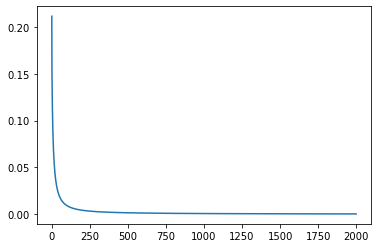

In [15]:
plt.plot(history.history['loss'])

In [16]:
model.predict(x_train)

array([[9.9999475e-01, 9.7216541e-01],
       [9.8534364e-01, 2.3469660e-02],
       [9.8534364e-01, 2.3469660e-02],
       [2.3292342e-02, 1.6537919e-05]], dtype=float32)

In [17]:
print('TF weights',model.weights[0])
print('TF bias',model.weights[1])
print('weighs',w)
print('bias',b)

TF weights <tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[7.944182, 7.281541],
       [7.944177, 7.281541]], dtype=float32)>
TF bias <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([ -3.7360628, -11.009838 ], dtype=float32)>
weighs [[0.29146406 0.42208366]
 [0.31015233 0.33496968]]
bias [[-3.22391946]
 [-3.22057881]]
